# BT2101 Homework 2

## 1 Goal
In this notebook, we will look at the Telco Customer Churn data and we will:
<ul>
    <li>explore the data</li>
    <li>analyse the data</li>
    <li>train and test models</li>
</ul>

In [707]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.plotly as py
#import plotly.graph_objs as go
%matplotlib inline

## 2 Exploratory Data Analysis
In this section, we will find out more about the data that we have.
It also includes some data cleaning.

In [708]:
# Load dataset
data = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [709]:
# 7043 instances, 19 features + ID + classification (churn)
data.shape

(7043, 21)

In [710]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [711]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 2.1 Minor Data Cleaning
Before proceeding to plot graphs, we will:
<ol>
    <li>Checking for all feature values</li>
    <li>Replace/remove certain feature values</li>
</ol>

In [712]:
# check values for categorical variables, ensure all types of categories are accounted for
def check_values(feature, x):
    for i in data[feature]:
        if i not in x:
            return i
    return "done"
        
print("gender: " + check_values('gender', ['Male', 'Female']))
print("Senior Citizen: " + check_values('SeniorCitizen', [0, 1]))
print("Partner: " + check_values('Partner', ['Yes', 'No']))
print("Dependents: " + check_values('Dependents', ['Yes', 'No']))
print("PhoneService: " + check_values('PhoneService', ['Yes', 'No']))
print("MultipleLines: " + check_values('MultipleLines', ['Yes', 'No', 'No phone service']))
print("InternetService: " + check_values('InternetService', ['DSL', 'Fiber optic', 'No']))
print("OnlineSecurity: " + check_values('OnlineSecurity', ['Yes', 'No', 'No internet service']))
print("OnlineBackup: " + check_values('OnlineBackup', ['Yes', 'No', 'No internet service']))
print("DeviceProtection: " + check_values('DeviceProtection', ['Yes', 'No', 'No internet service']))
print("TechSupport: " + check_values('TechSupport', ['Yes', 'No', 'No internet service']))
print("StreamingTV: " + check_values('StreamingTV', ['Yes', 'No', 'No internet service']))
print("StreamingMovies: " + check_values('StreamingMovies', ['Yes', 'No', 'No internet service']))
print("Contract: " + check_values('Contract', ['Month-to-month', 'One year', 'Two year']))
print("PaperlessBilling: " + check_values('PaperlessBilling', ['Yes', 'No']))
print("PaymentMethod: " + check_values('PaymentMethod', ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']))
print("Churn: " + check_values('Churn', ['Yes', 'No']))


# check values for continuous variables, ensure no null values, no " "
def check_cont(feature):
    for i in data[feature]:
        if i==" ":
            return i
    return "done"

print("Tenure: " + check_cont('tenure'))
print("MonthlyCharges: " + check_cont('MonthlyCharges'))
print("TotalCharges: " + check_cont('TotalCharges'))

gender: done
Senior Citizen: done
Partner: done
Dependents: done
PhoneService: done
MultipleLines: done
InternetService: done
OnlineSecurity: done
OnlineBackup: done
DeviceProtection: done
TechSupport: done
StreamingTV: done
StreamingMovies: done
Contract: done
PaperlessBilling: done
PaymentMethod: done
Churn: done
Tenure: done
MonthlyCharges: done
TotalCharges:  


**Findings**: TotalCharges has " " as some of their values.

=> Proceed to replace " " with 0.

In [713]:
data['TotalCharges'].replace(" ", '0', inplace=True)

As there is already a column for PhoneService and InternetService, there is no need to show whether there is phone/internet service in the columns MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. Hence, we replace 'No phone service' or 'No internet service' with 'No' in these columns.

In [714]:
data['MultipleLines'].replace('No phone service', 'No', inplace=True)
data['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
data['OnlineBackup'].replace('No internet service', 'No', inplace=True)
data['DeviceProtection'].replace('No internet service', 'No', inplace=True)
data['TechSupport'].replace('No internet service', 'No', inplace=True)
data['StreamingTV'].replace('No internet service', 'No', inplace=True)
data['StreamingMovies'].replace('No internet service', 'No', inplace=True)

### 2.2 Plotting Graphs for Categorical Variables
#### Distribution of Customer Churn

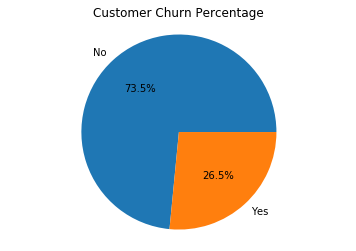

In [715]:
# data to plot
sizes = data['Churn'].value_counts()
#print(sizes)
labels = 'No', 'Yes'

# plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Customer Churn Percentage')
plt.axis('equal')
plt.show()

#### The following shows the distribution of churn by the feature values.

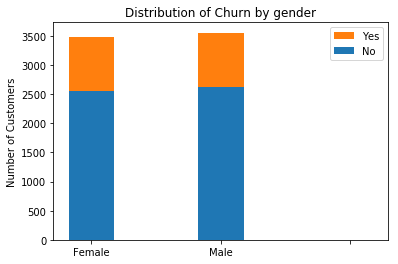

In [716]:
# gender distribution
N = 3
ind = np.arange(N)
width = 0.35

temp = data.groupby('gender').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2], 0)
yes = (temp[1], temp[3], 0)
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by gender')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('Female', 'Male', ''))
plt.legend((p2[0], p1[0]), ('Yes', 'No'), loc = 1)

plt.show()

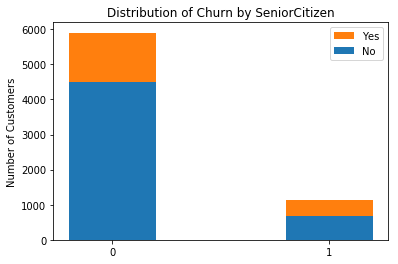

In [717]:
# senior citizen distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('SeniorCitizen').Churn.value_counts()
#print(temp)

no = (temp[0][0], temp[1][0])
yes = (temp[0][1], temp[1][1])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by SeniorCitizen')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('0', '1'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

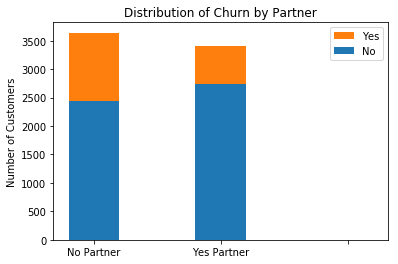

In [718]:
# partner distribution
N = 3
ind = np.arange(N)
width = 0.4

temp = data.groupby('Partner').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2], 0)
yes = (temp[1], temp[3], 0)
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by Partner')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No Partner', 'Yes Partner', ''))
plt.legend((p2[0], p1[0]), ('Yes', 'No'), loc = 1)

plt.show()

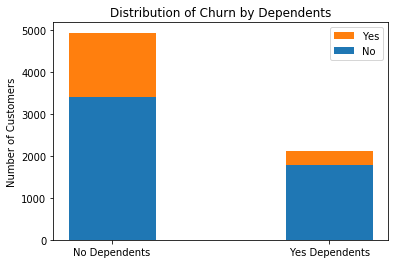

In [719]:
# dependents distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('Dependents').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by Dependents')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No Dependents', 'Yes Dependents'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'), loc = 1)

plt.show()

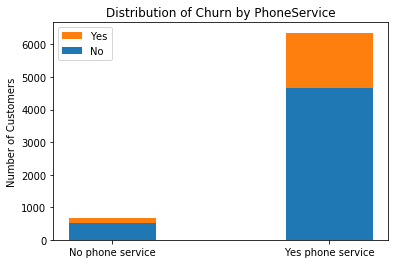

In [720]:
# phone service distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('PhoneService').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by PhoneService')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No phone service', 'Yes phone service'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

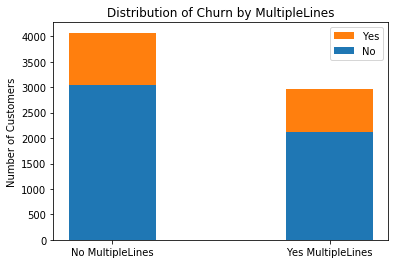

In [721]:
# multiple lines distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('MultipleLines').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by MultipleLines')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No MultipleLines', 'Yes MultipleLines'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

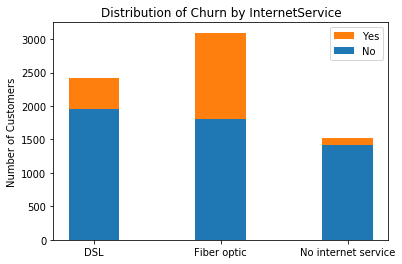

In [722]:
# internet service distribution
N = 3
ind = np.arange(N)
width = 0.4

temp = data.groupby('InternetService').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2], temp[4])
yes = (temp[1], temp[3], temp[5])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by InternetService')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('DSL', 'Fiber optic', 'No internet service'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

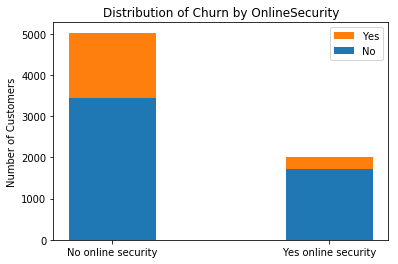

In [723]:
# online security distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('OnlineSecurity').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by OnlineSecurity')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No online security', 'Yes online security'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

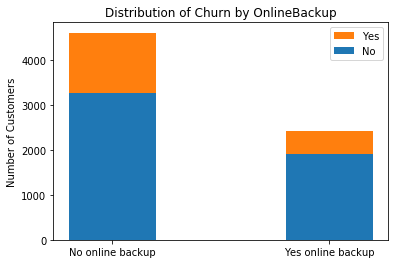

In [724]:
# online backup distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('OnlineBackup').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by OnlineBackup')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No online backup', 'Yes online backup'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

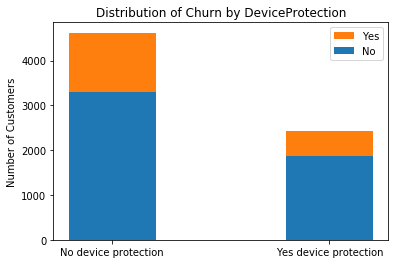

In [725]:
# device protection distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('DeviceProtection').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by DeviceProtection')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No device protection', 'Yes device protection'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

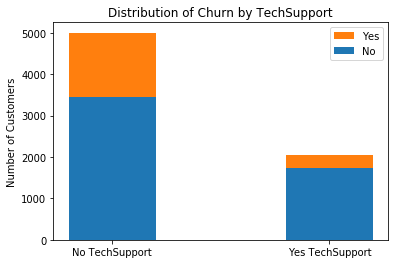

In [726]:
# tech support distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('TechSupport').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by TechSupport')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No TechSupport', 'Yes TechSupport'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

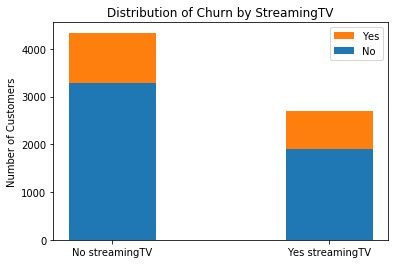

In [727]:
# streaming TV distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('StreamingTV').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by StreamingTV')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No streamingTV', 'Yes streamingTV'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

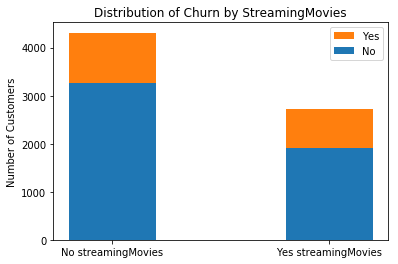

In [728]:
# streaming movies distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('StreamingMovies').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by StreamingMovies')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No streamingMovies', 'Yes streamingMovies'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

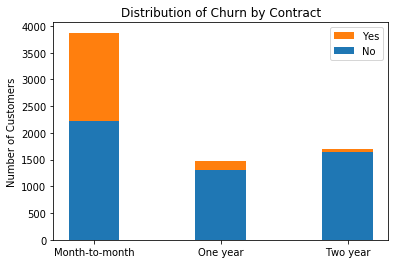

In [729]:
# contract distribution
N = 3
ind = np.arange(N)
width = 0.4

temp = data.groupby('Contract').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2], temp[4])
yes = (temp[1], temp[3], temp[5])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by Contract')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('Month-to-month', 'One year', 'Two year'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

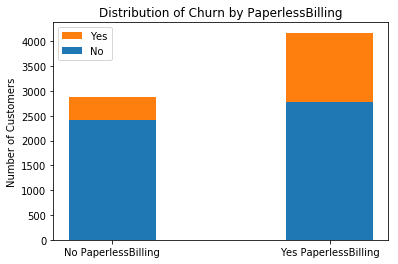

In [730]:
# paperless billing distribution
N = 2
ind = np.arange(N)
width = 0.4

temp = data.groupby('PaperlessBilling').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2])
yes = (temp[1], temp[3])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by PaperlessBilling')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('No PaperlessBilling', 'Yes PaperlessBilling'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

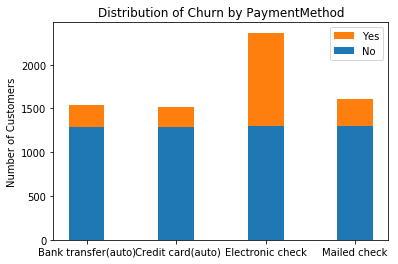

In [731]:
# payment method distribution
N = 4
ind = np.arange(N)
width = 0.4

temp = data.groupby('PaymentMethod').Churn.value_counts()
#print(temp)

no = (temp[0], temp[2], temp[4], temp[6])
yes = (temp[1], temp[3], temp[5], temp[7])
#print(no)
#print(yes)

p1 = plt.bar(ind, no, width)
p2 = plt.bar(ind, yes, width, bottom = no)

plt.title('Distribution of Churn by PaymentMethod')
plt.ylabel('Number of Customers')
plt.xticks(ind, ('Bank transfer(auto)', ' Credit card(auto)', 'Electronic check', 'Mailed check'))
plt.legend((p2[0], p1[0]), ('Yes', 'No'))

plt.show()

### 2.3 Plotting of Box Plots for Continuous Variables

In [732]:
#s = pd.to_numeric(data['TotalCharges'])
data['TotalCharges'] = data.TotalCharges.astype(float)

In [733]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [734]:
#churn     = data[data["Churn"] == "Yes"]
#no_churn = data[data["Churn"] == "No"]
churn = data.loc[data['Churn'] == 'Yes']
no_churn = data.loc[data['Churn'] == 'No']
#df.loc[df['column_name'] == some_value]

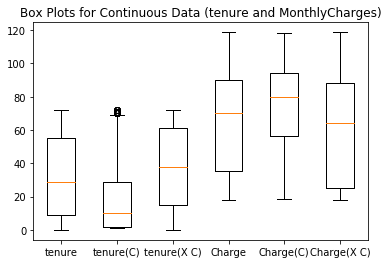

In [735]:
temp = [data['tenure'], churn['tenure'], no_churn['tenure'], data['MonthlyCharges'], churn['MonthlyCharges'], no_churn['MonthlyCharges']]

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plots for Continuous Data (tenure and MonthlyCharges)')
ax1.boxplot(temp, labels=('tenure','tenure(C)', 'tenure(X C)','Charge', 'Charge(C)', 'Charge(X C)'))
plt.show()

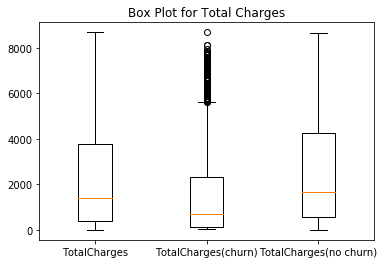

In [736]:
temp = [data['TotalCharges'], churn['TotalCharges'], no_churn['TotalCharges']]
fig2, ax2 = plt.subplots()
ax2.set_title('Box Plot for Total Charges') 
# plotted separately as the values are too large, 
# will not be able to see the spread for tenure and monthly charges
ax2.boxplot(temp, labels = ('TotalCharges', 'TotalCharges(churn)', 'TotalCharges(no churn)'))
plt.show()

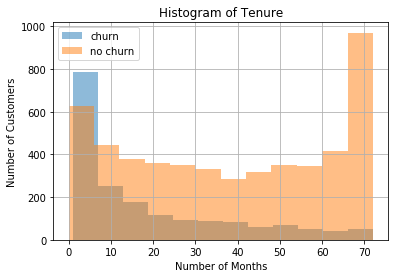

In [737]:
from matplotlib import pyplot

# histogram of tenure
# each bin represents half a year (6 months)
#n, bins, patches = plt.hist(data['tenure'], 12, rwidth = 0.5)
pyplot.hist(churn['tenure'], 12, label = 'churn', alpha=0.5)
pyplot.hist(no_churn['tenure'], 12, label='no churn', alpha=0.5)
pyplot.xlabel('Number of Months')
pyplot.ylabel('Number of Customers')
pyplot.title('Histogram of Tenure')
pyplot.legend()
pyplot.grid()
pyplot.show()

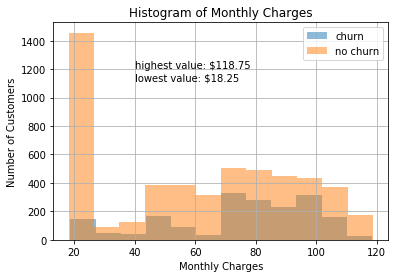

In [738]:
# histogram of monthly charges
#n, bins, patches = plt.hist(data['MonthlyCharges'], rwidth = 0.5)
pyplot.hist(churn['MonthlyCharges'], 12, label = 'churn', alpha=0.5)
pyplot.hist(no_churn['MonthlyCharges'], 12, label='no churn', alpha=0.5)

pyplot.xlabel('Monthly Charges')
pyplot.ylabel('Number of Customers')
pyplot.title('Histogram of Monthly Charges')
pyplot.text(40, 1210, 'highest value: $' + str(max(data['MonthlyCharges'])))
pyplot.text(40, 1120, 'lowest value: $' + str(min(data['MonthlyCharges'])))
pyplot.legend()
pyplot.grid(True)
pyplot.show()

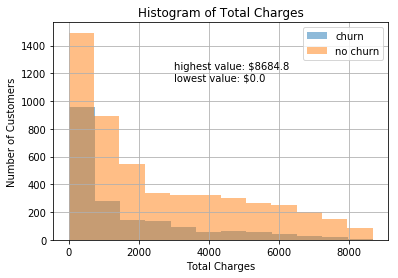

In [739]:
# histogram of total charges
#n, bins, patches = plt.hist(data['TotalCharges'], rwidth = 0.5)
pyplot.hist(churn['TotalCharges'], 12, label = 'churn', alpha=0.5)
pyplot.hist(no_churn['TotalCharges'], 12, label='no churn', alpha=0.5)

pyplot.xlabel('Total Charges')
pyplot.ylabel('Number of Customers')
pyplot.title('Histogram of Total Charges')
pyplot.text(3000, 1230, 'highest value: $' + str(max(data['TotalCharges'])))
pyplot.text(3000, 1150, 'lowest value: $' + str(min(data['TotalCharges'])))
pyplot.legend()
pyplot.grid(True)
pyplot.show()

## 3 Data Pre-Processing
In this section, we will:
* convert categorical variables to binary
* standardise continuous variables
* decide features to drop

### 3.1 Converting Categorical Variables to Binary

In [740]:
# Male -> 1, Female -> 0
data['gender'] = data['gender'].map(lambda x :1 if x == 'Male' else 0)

# Yes -> 1, No -> 0
data['Partner'] = data['Partner'].map(lambda x :1 if x == 'Yes' else 0)
data['Dependents'] = data['Dependents'].map(lambda x :1 if x == 'Yes' else 0)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda x :1 if x == 'Yes' else 0)
data['Churn'] = data['Churn'].map(lambda x :1 if x == 'Yes' else 0)
data['PhoneService'] = data['PhoneService'].map(lambda x :1 if x == 'Yes' else 0)
data['MultipleLines'] = data['MultipleLines'].map(lambda x :1 if x == 'Yes' else 0)

# create new columns to binarise values
# InternetService now becomes a yes/no column, has internet service -> 1, no internet service -> 0
# FiberOptic and DSL columns: yes -> 1, no -> 0
data['FiberOptic'] = data['InternetService'].map(lambda x :1 if x =='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda x :1 if x =='DSL' else 0)
data['InternetService'] = data['InternetService'].map(lambda x :0 if x =='No' else 1)

# Yes -> 1, No -> 0 (no internet service also counts as no)
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda x :1 if x == 'Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda x :1 if x == 'Yes' else 0)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda x :1 if x == 'Yes' else 0)
data['TechSupport'] = data['TechSupport'].map(lambda x :1 if x == 'Yes' else 0)
data['StreamingTV'] = data['StreamingTV'].map(lambda x :1 if x == 'Yes' else 0)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda x :1 if x == 'Yes' else 0)

# split features with more than 2 values into more columns
data = pd.get_dummies(data=data, columns=['Contract'])
data = pd.get_dummies(data=data, columns=['PaymentMethod'])

### 3.2 Splitting Features into Categorical or Continuous
For easy access of variables

In [741]:
data.drop(['customerID'], axis=1, inplace=True) # custID not required in classification
features = list(data)
target = ['Churn']
cont_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = [x for x in features if x not in cont_features+target]

#print(len(features))
#print(cat_features)

### 3.3 Standardising Continuous Variables
#### Using z-index method (StandardScaler)

In [742]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std = StandardScaler()
features_std = std.fit_transform(data[cont_features])
features_std = pd.DataFrame(features_std, columns = cont_features)

# create new dataframe for standardised features
df1 = data.copy()
df1 = df1.drop(columns = cont_features, axis = 1)
df1 = df1.merge(features_std , left_index=True, right_index=True, how = "left")
df1

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.992611
1,1,0,0,0,1,0,1,1,0,1,...,0,1,0,0,0,0,1,0.066327,-0.259629,-0.172165
2,1,0,0,0,1,0,1,1,1,0,...,1,0,0,0,0,0,1,-1.236724,-0.362660,-0.958066
3,1,0,0,0,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0.514251,-0.746535,-0.193672
4,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,-1.236724,0.197365,-0.938874
5,0,0,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,-0.992402,1.159546,-0.643789
6,1,0,0,1,1,1,1,0,1,0,...,1,0,0,0,1,0,0,-0.422317,0.808907,-0.145738
7,0,0,0,0,0,0,1,1,0,0,...,1,0,0,0,0,0,1,-0.910961,-1.163647,-0.872587
8,0,0,1,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,-0.177995,1.330711,0.338085
9,1,0,0,1,1,0,1,1,1,0,...,0,1,0,1,0,0,0,1.206498,-0.286218,0.533044


#### Using min-max method (MinMaxScaler)

In [743]:
minMax = MinMaxScaler()
features_minMaxStd = minMax.fit_transform(data[cont_features])
features_minMaxStd = pd.DataFrame(features_minMaxStd, columns = cont_features)

# create new dataframe for standardised features
df2 = data.copy()
df2 = df2.drop(columns = cont_features, axis = 1)
df2 = df2.merge(features_minMaxStd , left_index=True, right_index=True, how = "left")
len(list(df2))

27

### 3.4 Selecting Features to Drop
#### Using Univariate Feature Selection 
* chi-square test

In [744]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# select columns
cols = [i for i in df2.columns if i not in target]

# use dataframe with non negative values
df_x = df2[cols]
df_y = df2[target]

# fit model with k=3
select = SelectKBest(score_func = chi2, k = 7)
fit = select.fit(df_x, df_y)

# summarise scores
print("scores: " + str(fit.scores_))
print("p-values: " + str(fit.pvalues_))


scores: [2.58698618e-01 1.34351545e+02 8.24120826e+01 1.33036443e+02
 9.72606249e-02 6.54851159e+00 7.92513711e+01 1.47295858e+02
 3.12176940e+01 2.02266622e+01 1.35559783e+02 1.73342348e+01
 1.62425307e+01 1.05680863e+02 3.74476216e+02 7.13131803e+01
 5.19895311e+02 1.76123171e+02 4.88578090e+02 7.64859132e+01
 9.95820574e+01 4.26422767e+02 4.56515896e+01 2.26096162e+02
 5.09953708e+01 7.18832907e+01]
p-values: [6.11015635e-001 4.57695863e-031 1.10476396e-019 8.87672856e-031
 7.55142091e-001 1.04971937e-002 5.46893932e-019 6.76169598e-034
 2.30654124e-008 6.87875040e-006 2.49054941e-031 3.13488073e-005
 5.57288653e-005 8.66198711e-025 1.98426029e-083 3.04792940e-017
 4.45983158e-115 3.40360630e-040 2.90538967e-108 2.21789430e-018
 1.88201787e-023 9.76067669e-095 1.41271379e-011 4.23385113e-051
 9.25840542e-013 2.28309065e-017]


In [745]:
# display data
score = pd.DataFrame({"features": cols, "scores": fit.scores_, "p_values": fit.pvalues_ })
score = score.sort_values(by = "scores", ascending = False)
score

,features,scores,p_values
16,Contract_Month-to-month,519.895311,4.459832e-115
18,Contract_Two year,488.578090,2.905390e-108
21,PaymentMethod_Electronic check,426.422767,9.760677e-95
14,FiberOptic,374.476216,1.984260e-83
23,tenure,226.096162,4.233851e-51
17,Contract_One year,176.123171,3.403606e-40
7,OnlineSecurity,147.295858,6.761696e-34
10,TechSupport,135.559783,2.490549e-31
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31


We decide to keep the top 7 features.

In [746]:
features_drop = ['TechSupport', 'SeniorCitizen', 'Dependents', 'PaperlessBilling', \
                 'PaymentMethod_Credit card (automatic)', 'Partner', 'InternetService', \
                 'PaymentMethod_Bank transfer (automatic)', 'TotalCharges', 'DSL', \
                 'MonthlyCharges', 'PaymentMethod_Mailed check', 'OnlineBackup', \
                 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines', \
                 'gender', 'PhoneService']
df3 = df2.copy()
df3 = df3.drop(columns = features_drop, axis=1)
print(list(df3))
df3

['OnlineSecurity', 'Churn', 'FiberOptic', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Electronic check', 'tenure']


,OnlineSecurity,Churn,FiberOptic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,tenure
0,0,0,0,1,0,0,1,0.013889
1,1,0,0,0,1,0,0,0.472222
2,1,1,0,1,0,0,0,0.027778
3,1,0,0,0,1,0,0,0.625000
4,0,1,1,1,0,0,1,0.027778
5,0,1,1,1,0,0,1,0.111111
6,0,0,1,1,0,0,0,0.305556
7,1,0,0,1,0,0,0,0.138889
8,0,1,1,1,0,0,1,0.388889
9,1,0,0,0,1,0,0,0.861111


In [747]:
list(data)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'FiberOptic',
 'DSL',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

## 4 Modelling
### 4.1 Baseline Model

In [748]:
# import libraries
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# df0: original data, without scaling
df0_target = data.columns[17]
df0_feature = list(data.columns[:17].append(data.columns[18:]))
df0_train_target = data[df0_target]
df0_train_feature = data[df0_feature]

# df1: use of StandardScaler, no features dropped
df1_target = df1.columns[14]
df1_feature = list(df1.columns[0:14].append(df1.columns[15:]))
df1_train_target = df1[df1_target]
df1_train_feature = df1[df1_feature]

# df2: use of MinMaxScaler, no features dropped
df2_target = df2.columns[14]
df2_feature = list(df2.columns[0:14].append(df2.columns[15:]))
df2_train_target = df2[df2_target]
df2_train_feature = df2[df2_feature]

# df3: use of MinMaxScaler, features dropped
df3_target = df3.columns[1]
df3_feature = list(df3.columns[0:1].append(df3.columns[2:]))
df3_train_target = df3[df3_target]
df3_train_feature = df3[df3_feature]

# split train data (df0)
df0_x_train, df0_x_valid, df0_y_train, df0_y_valid = train_test_split(df0_train_feature, \
                                                                      df0_train_target, \
                                                                      test_size=0.3, \
                                                                      random_state=12345)

# split train data (df1)
df1_x_train, df1_x_valid, df1_y_train, df1_y_valid = train_test_split(df1_train_feature, \
                                                                      df1_train_target, \
                                                                      test_size=0.3, \
                                                                      random_state=12345)

# split train data (df2)
df2_x_train, df2_x_valid, df2_y_train, df2_y_valid = train_test_split(df2_train_feature, \
                                                                      df2_train_target, \
                                                                      test_size=0.3, \
                                                                      random_state=12345)

# split train data (df3)
df3_x_train, df3_x_valid, df3_y_train, df3_y_valid = train_test_split(df3_train_feature, \
                                                                      df3_train_target, \
                                                                      test_size=0.3, \
                                                                      random_state=12345)


### 4.2 Improved Models
#### 4.2.1 Decision Tree

In [749]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# single decision tree model
DT = DecisionTreeClassifier(criterion='entropy', random_state=12345, max_depth=7)


# fit decision tree model to df0
DT_model0 = DT.fit(df0_x_train, df0_y_train)
# validation
y_pred_valid0 = DT_model0.predict(df0_x_valid)
# performance of decision tree model
print(confusion_matrix(df0_y_valid, y_pred_valid0))
print("Accuracy (df0): ", accuracy_score(df0_y_valid, y_pred_valid0))


# fit decision tree model to df1
DT_model1 = DT.fit(df1_x_train, df1_y_train)
# validation
y_pred_valid1 = DT_model1.predict(df1_x_valid)
# performance of decision tree model
print(confusion_matrix(df1_y_valid, y_pred_valid1))
print("Accuracy (df1): ", accuracy_score(df1_y_valid, y_pred_valid1))


# fit decision tree model to df2
DT_model2 = DT.fit(df2_x_train, df2_y_train)
# validation
y_pred_valid2 = DT_model2.predict(df2_x_valid)
# performance of decision tree model
print(confusion_matrix(df2_y_valid, y_pred_valid2))
print("Accuracy (df2): ", accuracy_score(df2_y_valid, y_pred_valid2))


# fit decision tree model to df3
DT_model3 = DT.fit(df3_x_train, df3_y_train)
# validation
y_pred_valid3 = DT_model3.predict(df3_x_valid)
# performance of decision tree model
print(confusion_matrix(df3_y_valid, y_pred_valid3))
print("Accuracy (df3): ", accuracy_score(df3_y_valid, y_pred_valid3))

[[1329  210]
 [ 244  330]]
Accuracy (df0):  0.7851396119261713
[[1329  210]
 [ 244  330]]
Accuracy (df1):  0.7851396119261713
[[1329  210]
 [ 244  330]]
Accuracy (df2):  0.7851396119261713
[[1360  179]
 [ 285  289]]
Accuracy (df3):  0.780407004259347


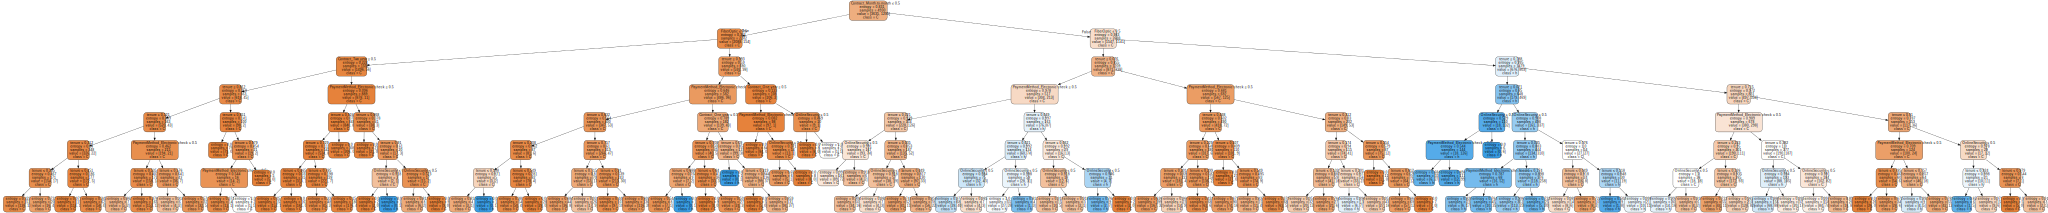

In [750]:
import graphviz

dot_data = tree.export_graphviz(DT_model0, out_file=None, feature_names=df3_feature, class_names=df3_target, 
                                filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
display(graph)

#### 4.2.2 Logistic Regression

In [751]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

#df3
# create multiple models
LR_model1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
LR_model2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l1', C=100, random_state=12345)

# fit the models
LR_model1.fit(X=df3_x_train, y=df3_y_train)
LR_model2.fit(X=df3_x_train, y=df3_y_train)

# Predict outputs for test data
model1_y_pred = LR_model1.predict(df3_x_valid)
model2_y_pred = LR_model2.predict(df3_x_valid)

# Create confusion matrix
cm1 = confusion_matrix(df3_y_valid, model1_y_pred)
TN1, FP1, FN1, TP1 = cm1.ravel()
print(cm1)
print(TN1, FP1, FN1, TP1)

cm2 = confusion_matrix(df3_y_valid, model2_y_pred)
TN2, FP2, FN2, TP2 = cm2.ravel()
print(cm2)
print(TN2, FP2, FN2, TP2)

# Performance of Logistic Regression
print("Accuracy (model1, df3): ", accuracy_score(df3_y_valid, model1_y_pred))
print("Accuracy (model2, df3): ", accuracy_score(df3_y_valid, model2_y_pred))


# df2
# create models
df2_LR_model1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
# fit the models
df2_LR_model1.fit(X=df2_x_train, y=df2_y_train)
# Predict outputs for test data
df2_model1_y_pred = df2_LR_model1.predict(df2_x_valid)
# Create confusion matrix
df2cm1 = confusion_matrix(df2_y_valid, df2_model1_y_pred)
df2TN1, df2FP1, df2FN1, df2TP1 = df2cm1.ravel()
print(df2cm1)
print(df2TN1, df2FP1, df2FN1, df2TP1)
# Performance of Logistic Regression
print("Accuracy (model1, df2): ", accuracy_score(df2_y_valid, df2_model1_y_pred))
#print("Accuracy (model2): ", accuracy_score(df3_y_valid, model2_y_pred))

# df0
# create models
df0_LR_model1 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
# fit the models
df0_LR_model1.fit(X=df0_x_train, y=df0_y_train)
# Predict outputs for test data
df0_model1_y_pred = df0_LR_model1.predict(df0_x_valid)
# Create confusion matrix
df0cm1 = confusion_matrix(df0_y_valid, df0_model1_y_pred)
df0TN1, df0FP1, df0FN1, df0TP1 = df0cm1.ravel()
print(df0cm1)
print(df0TN1, df0FP1, df0FN1, df0TP1)
# Performance of Logistic Regression
print("Accuracy (model1, df0): ", accuracy_score(df0_y_valid, df0_model1_y_pred))
#print("Accuracy (model2): ", accuracy_score(df3_y_valid, model2_y_pred))

[[1370  169]
 [ 290  284]]
1370 169 290 284
[[1370  169]
 [ 290  284]]
1370 169 290 284
Accuracy (model1, df3):  0.7827733080927591
Accuracy (model2, df3):  0.7827733080927591
[[1369  170]
 [ 265  309]]
1369 170 265 309
Accuracy (model1, df2):  0.7941315664931378
[[1369  170]
 [ 264  310]]
1369 170 264 310
Accuracy (model1, df0):  0.7946048272598202


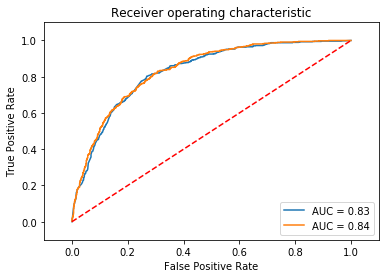

In [752]:
from sklearn.metrics import roc_curve, auc

# Get predicted scores Pr(y=1): Used as thresholds for calculating TP Rate and FP Rate
# lr.classes_
score1 = LR_model1.predict_proba(df3_x_valid)[:, 1]
score2 = df2_LR_model1.predict_proba(df2_x_valid)[:, 1]

# Plot ROC Curve
fpr1, tpr1, thresholds1 = roc_curve(df3_y_valid, score1) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(df3_y_valid, score2) # fpr: FP Rate, tpr: TP Rate, thresholds: Pr(y=1)
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr1, tpr1, label='AUC = %0.2f'% roc_auc1)
plt.plot(fpr2, tpr2, label='AUC = %0.2f'% roc_auc2) # almost overlaps with df3 model1 curve
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.title('Receiver operating characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [753]:
# do 10-fold cross validation
kf = KFold(n_splits=500, random_state=12345)

# do cross validation
cv_model1 = cross_val_score(LR_model1, # Cross-validation on model_1
                             df3[df3_feature], # Feature matrix
                             df3[df3_target], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
cv_model2 = cross_val_score(LR_model2, # Cross-validation on model_1
                             df3[df3_feature], # Feature matrix
                             df3[df3_target], # Output vector
                             cv=kf, # Cross-validation technique
                             scoring='accuracy' # Model performance metrics: accuracy
                            )
cv_model3 = cross_val_score(df0_LR_model1,
                           data[df0_feature],
                           data[df0_target],
                           cv=kf, scoring = 'accuracy')

#print(cv_model1)
#print(cv_model2)

In [754]:
# calculate average accuracy
def avg_accuracy(model):
    count = 0
    total = 0
    for i in model:
        total += i
        count += 1
    result = total/count
    return result

# Report average cross-validation accuracy of Model 1
model1_accuracy = avg_accuracy(cv_model1)
print("Accuracy (df3, l2): " + str(model1_accuracy))

# Report average cross-validation accuracy of Model 2
model2_accuracy = avg_accuracy(cv_model2)
print("Accuracy (df3, l1): " + str(model2_accuracy))

# Report average cross-validation accuracy of Model 3
model3_accuracy = avg_accuracy(cv_model3)
print("Accuracy (df0, l2): " + str(model3_accuracy))

Accuracy (df3, l2): 0.7936380952380938
Accuracy (df3, l1): 0.7936380952380938
Accuracy (df0, l2): 0.8053428571428559


#### 4.2.3 Random Forest

In [755]:
from sklearn.ensemble import RandomForestClassifier

# df0
# Fit Random Forest Model
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model0 = RF.fit(df0_x_train, df0_y_train)
# Validation
y_pred_valid0 = RF_model0.predict(df0_x_valid)
# Performance of Random Forest model
cm = confusion_matrix(df0_y_valid, y_pred_valid0)
print(cm)
print("Accuracy (df0): ", accuracy_score(df0_y_valid, y_pred_valid0)) 



# df1
# Fit Random Forest Model
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model1 = RF.fit(df1_x_train, df1_y_train)
# Validation
y_pred_valid1 = RF_model1.predict(df1_x_valid)
# Performance of Random Forest model
cm = confusion_matrix(df1_y_valid, y_pred_valid1)
print(cm)
print("Accuracy (df1): ", accuracy_score(df1_y_valid, y_pred_valid1)) 



# df2
# Fit Random Forest Model
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model2 = RF.fit(df2_x_train, df2_y_train)
# Validation
y_pred_valid2 = RF_model2.predict(df2_x_valid)
# Performance of Random Forest model
cm = confusion_matrix(df2_y_valid, y_pred_valid2)
print(cm)
print("Accuracy (df2): ", accuracy_score(df2_y_valid, y_pred_valid2))



#df3
# Fit Random Forest Model
RF = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=12345)
RF_model = RF.fit(df3_x_train, df3_y_train)

# Validation
y_pred_valid = RF_model.predict(df3_x_valid)

# Performance of Random Forest model
cm = confusion_matrix(df3_y_valid, y_pred_valid)
print(cm)
print("Accuracy (df3): ", accuracy_score(df3_y_valid, y_pred_valid)) 

[[1366  173]
 [ 280  294]]
Accuracy (df0):  0.7856128726928537
[[1369  170]
 [ 291  283]]
Accuracy (df1):  0.7818267865593942
[[1369  170]
 [ 292  282]]
Accuracy (df2):  0.7813535257927118
[[1291  248]
 [ 276  298]]
Accuracy (df3):  0.7520113582584004


#### 4.2.4 Bagging

In [756]:
from sklearn.ensemble import BaggingClassifier

#df0
# Fit Bagging model
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model0 = BA.fit(df0_x_train, df0_y_train)
# Validation
y_pred_valid0 = BA_model0.predict(df0_x_valid)
# Performance of Bagging model
cm = confusion_matrix(df0_y_valid, y_pred_valid0)
print(cm)
print("Accuracy (df0): ", accuracy_score(df0_y_valid, y_pred_valid0))



#df1
# Fit Bagging model
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model1 = BA.fit(df1_x_train, df1_y_train)
# Validation
y_pred_valid1 = BA_model1.predict(df1_x_valid)
# Performance of Bagging model
cm = confusion_matrix(df1_y_valid, y_pred_valid1)
print(cm)
print("Accuracy (df1): ", accuracy_score(df1_y_valid, y_pred_valid1))



#df2
# Fit Bagging model
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model2 = BA.fit(df2_x_train, df2_y_train)
# Validation
y_pred_valid2 = BA_model2.predict(df2_x_valid)
# Performance of Bagging model
cm = confusion_matrix(df2_y_valid, y_pred_valid2)
print(cm)
print("Accuracy (df2): ", accuracy_score(df2_y_valid, y_pred_valid2))



#df3
# Fit Bagging model
BA = BaggingClassifier(n_estimators=100, random_state=12345)
BA_model = BA.fit(df3_x_train, df3_y_train)

# Validation
y_pred_valid = BA_model.predict(df3_x_valid)

# Performance of Bagging model
cm = confusion_matrix(df3_y_valid, y_pred_valid)
print(cm)
print("Accuracy (df3): ", accuracy_score(df3_y_valid, y_pred_valid))

[[1356  183]
 [ 293  281]]
Accuracy (df0):  0.7747278750591576
[[1346  193]
 [ 289  285]]
Accuracy (df1):  0.7718883104590629
[[1349  190]
 [ 290  284]]
Accuracy (df2):  0.7728348319924279
[[1303  236]
 [ 282  292]]
Accuracy (df3):  0.754850922858495


#### 4.2.5 Adaboost

In [757]:
from sklearn.ensemble import AdaBoostClassifier

# df0
# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model0 = Ada.fit(df0_x_train, df0_y_train)
# Validation
y_pred_valid0 = Ada_model0.predict(df0_x_valid)
# Performance of Adaboost model
cm = confusion_matrix(df0_y_valid, y_pred_valid0)
print(cm)
print("Accuracy (df0): ", accuracy_score(df0_y_valid, y_pred_valid0))



# df1
# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model1 = Ada.fit(df1_x_train, df1_y_train)
# Validation
y_pred_valid1 = Ada_model1.predict(df1_x_valid)
# Performance of Adaboost model
cm = confusion_matrix(df1_y_valid, y_pred_valid1)
print(cm)
print("Accuracy (df1): ", accuracy_score(df1_y_valid, y_pred_valid1))



# df2
# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model2 = Ada.fit(df2_x_train, df2_y_train)
# Validation
y_pred_valid2 = Ada_model2.predict(df2_x_valid)
# Performance of Adaboost model
cm = confusion_matrix(df2_y_valid, y_pred_valid2)
print(cm)
print("Accuracy (df2): ", accuracy_score(df2_y_valid, y_pred_valid2))



#df3
# Fit Adaboosting Model
Ada = AdaBoostClassifier(n_estimators=100, random_state=12345)
Ada_model = Ada.fit(df3_x_train, df3_y_train)

# Validation
y_pred_valid = Ada_model.predict(df3_x_valid)

# Performance of Adaboost model
cm = confusion_matrix(df3_y_valid, y_pred_valid)
print(cm)
print("Accuracy (df3): ", accuracy_score(df3_y_valid, y_pred_valid))

[[1372  167]
 [ 271  303]]
Accuracy (df0):  0.7927117841930904
[[1372  167]
 [ 271  303]]
Accuracy (df1):  0.7927117841930904
[[1372  167]
 [ 271  303]]
Accuracy (df2):  0.7927117841930904
[[1378  161]
 [ 295  279]]
Accuracy (df3):  0.7841930903928065


## 5 Model Performance

In [758]:
def model_report(model, train_x, test_x, train_y, test_y, name):
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)
    accuracy = accuracy_score(test_y, prediction)
    recallscore = recall_score(test_y, prediction)
    precision = precision_score(test_y, prediction)
    f1 = f1_score(test_y, prediction)
    #roc_auc = roc_auc_score(test_y, prediction)
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1]
                       #"Area_under_curve": [roc_auc],
                      })
    return df

model1 = model_report(DecisionTreeClassifier(), df0_x_train, df0_x_valid, df0_y_train, df0_y_valid, 'Decision Tree (df0)')
model2 = model_report(DecisionTreeClassifier(), df1_x_train, df1_x_valid, df1_y_train, df1_y_valid, 'Decision Tree (df1)')
model3 = model_report(DecisionTreeClassifier(), df2_x_train, df2_x_valid, df2_y_train, df2_y_valid, 'Decision Tree (df2)')
model4 = model_report(DecisionTreeClassifier(), df3_x_train, df3_x_valid, df3_y_train, df3_y_valid, 'Decision Tree (df3)')
model5 = model_report(RandomForestClassifier(), df0_x_train, df0_x_valid, df0_y_train, df0_y_valid, 'Random Forest (df0)')
model6 = model_report(RandomForestClassifier(), df1_x_train, df1_x_valid, df1_y_train, df1_y_valid, 'Random Forest (df1)')
model7 = model_report(RandomForestClassifier(), df2_x_train, df2_x_valid, df2_y_train, df2_y_valid, 'Random Forest (df2)')
model8 = model_report(RandomForestClassifier(), df3_x_train, df3_x_valid, df3_y_train, df3_y_valid, 'Random Forest (df3)')
model9 = model_report(BaggingClassifier(), df0_x_train, df0_x_valid, df0_y_train, df0_y_valid, 'Bagging (df0)')
model10 = model_report(BaggingClassifier(), df1_x_train, df1_x_valid, df1_y_train, df1_y_valid, 'Bagging (df1)')
model11 = model_report(BaggingClassifier(), df2_x_train, df2_x_valid, df2_y_train, df2_y_valid, 'Bagging (df2)')
model12 = model_report(BaggingClassifier(), df3_x_train, df3_x_valid, df3_y_train, df3_y_valid, 'Bagging (df3)')
model13 = model_report(AdaBoostClassifier(), df0_x_train, df0_x_valid, df0_y_train, df0_y_valid, 'Adaboost (df0)')
model14 = model_report(AdaBoostClassifier(), df1_x_train, df1_x_valid, df1_y_train, df1_y_valid, 'Adaboost (df1)')
model15 = model_report(AdaBoostClassifier(), df2_x_train, df2_x_valid, df2_y_train, df2_y_valid, 'Adaboost (df2)')
model16 = model_report(AdaBoostClassifier(), df3_x_train, df3_x_valid, df3_y_train, df3_y_valid, 'Adaboost (df3)')

model_performance = pd.concat([model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14, model15, model16], axis = 0).reset_index()
model_performance.drop(columns = "index",axis =1, inplace=True)

print(model_performance)


                  Model  Accuracy_score  Recall_score  Precision  f1_score
0   Decision Tree (df0)        0.730715      0.543554   0.504039  0.523051
1   Decision Tree (df1)        0.731188      0.533101   0.504950  0.518644
2   Decision Tree (df2)        0.730241      0.529617   0.503311  0.516129
3   Decision Tree (df3)        0.764316      0.493031   0.577551  0.531955
4   Random Forest (df0)        0.773308      0.440767   0.615572  0.513706
5   Random Forest (df1)        0.772835      0.461672   0.607798  0.524752
6   Random Forest (df2)        0.777567      0.451220   0.625604  0.524291
7   Random Forest (df3)        0.754851      0.519164   0.551852  0.535009
8         Bagging (df0)        0.769049      0.449477   0.600000  0.513944
9         Bagging (df1)        0.769995      0.442509   0.604762  0.511066
10        Bagging (df2)        0.767156      0.456446   0.592760  0.515748
11        Bagging (df3)        0.755324      0.505226   0.554493  0.528715
12       Adaboost (df0)  